In [90]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import numpy as np
np.random.seed(42)

import pandas as pd
pd.set_option('display.max_columns', None)

import ast

In [ ]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id='3c46d1de213842cb8c5de3fa085a54ac',
    client_secret='180cb120931c471cac759d8a3f50052f'))
sp.category('hiphop', country='US')

In [ ]:
# sp.recommendation_genre_seeds()

In [2]:
def randotrack():
    # all available characters
    chars = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    # get random character
    randnum = np.random.randint(0,62)
    randchar = chars[randnum]
    # wildcard at beginning, end, or both?
    wildnum = np.random.randint(0,3)
    if wildnum == 0:
        return '%' + randchar
    if wildnum == 1:
        return randchar + '%'
    if wildnum == 2:
        return '%' + randchar + '%'

In [ ]:
# there are a metric ton of available hip-hop tracks in the past 3 years
# more popular tracks come up first, but offset only goes to ~990 w/ limit=10
# therefore, I gotta do a random track id, with a random offset
# I'll run this many times and collect all the track info in a big list
rap = sp.search(q=f"genre:hip-hop year:2020-2021 track:{randotrack()}", market='US')

Notes:
- 'popularity' from 0-100, with higher the better. One [source](https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/) says 50 is the magic number

In [ ]:
rap['tracks']['total']

In [ ]:
rap['tracks'].keys()

In [ ]:
rap['tracks']['items'][0].keys()

In [ ]:
rap['tracks']['items'][0]['album'].keys()

# let's fill out some dataframes




In [3]:
def get_tracks(tracknum=10000, limit=50):
    sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
        client_id='3c46d1de213842cb8c5de3fa085a54ac',
        client_secret='180cb120931c471cac759d8a3f50052f'),
        requests_timeout=50000)
    track_dict = {'id': [], 'popularity': [], 'track': [], 'artists': [], 'album_name': [],
                  'album_type': [], 'release_date': [], 'image': [], 'duration_ms': [], 
                  'preview_url': []}
    repeat_id_count = 0
    while len(track_dict['id']) < tracknum:
        search = sp.search(q=f"genre:hip-hop year:2019-2021 track:{randotrack()}",
                           offset=np.random.randint(1001-limit),
                           limit=limit, market='US')
        for track in search['tracks']['items']:
            if track['id'] in track_dict['id']:
                repeat_id_count += 1
                continue
            for col in track_dict.keys():
                if col == 'track':
                    track_dict['track'].append(track['name'])
                    continue
                if col == 'artists':
                    track_dict['artists'].append(
                        [a['name'] for a in track['artists']])
                    continue
                if col == 'album_name':
                    track_dict['album_name'].append(track['album']['name'])
                    continue
                if col == 'album_type':
                    track_dict['album_type'].append(
                        track['album']['album_type'])
                    continue
                if col == 'release_date':
                    track_dict['release_date'].append(
                        track['album']['release_date'])
                    continue
                if col == 'image':
                    try:
                        track_dict['image'].append(
                            track['album']['images'][0]['url'])
                        continue
                    except:
                        track_dict['image'].append(np.nan)
                        continue
                track_dict[col].append(track[col])
    print('Repeat ID Count:\n', repeat_id_count)
    return pd.DataFrame(track_dict)

In [4]:
for i in range(35,500):
        print(f'Data chunk #{i}...')
        get_tracks().to_csv(f'data/collection_1/track_df{i}.csv')

Data chunk #35...
Repeat ID Count:
 7521
Data chunk #36...
Repeat ID Count:
 7133
Data chunk #37...
Repeat ID Count:
 7225
Data chunk #38...
Repeat ID Count:
 8315
Data chunk #39...
Repeat ID Count:
 6532
Data chunk #40...
Repeat ID Count:
 6733
Data chunk #41...
Repeat ID Count:
 7959
Data chunk #42...
Repeat ID Count:
 8657
Data chunk #43...
Repeat ID Count:
 8236
Data chunk #44...
Repeat ID Count:
 8735
Data chunk #45...
Repeat ID Count:
 6949
Data chunk #46...
Repeat ID Count:
 9938
Data chunk #47...
Repeat ID Count:
 8442
Data chunk #48...
Repeat ID Count:
 7947
Data chunk #49...
Repeat ID Count:
 9201
Data chunk #50...
Repeat ID Count:
 7203
Data chunk #51...
Repeat ID Count:
 7517
Data chunk #52...
Repeat ID Count:
 8722
Data chunk #53...
Repeat ID Count:
 7621
Data chunk #54...
Repeat ID Count:
 8320
Data chunk #55...
Repeat ID Count:
 7297
Data chunk #56...
Repeat ID Count:
 7975
Data chunk #57...
Repeat ID Count:
 7871
Data chunk #58...
Repeat ID Count:
 7882
Data chunk #59..

Repeat ID Count:
 8141
Data chunk #233...
Repeat ID Count:
 8997
Data chunk #234...
Repeat ID Count:
 6875
Data chunk #235...
Repeat ID Count:
 6763
Data chunk #236...
Repeat ID Count:
 9035
Data chunk #237...
Repeat ID Count:
 7562
Data chunk #238...
Repeat ID Count:
 9142
Data chunk #239...
Repeat ID Count:
 7884
Data chunk #240...
Repeat ID Count:
 8496
Data chunk #241...
Repeat ID Count:
 8276
Data chunk #242...
Repeat ID Count:
 8282
Data chunk #243...
Repeat ID Count:
 7846
Data chunk #244...
Repeat ID Count:
 9606
Data chunk #245...
Repeat ID Count:
 9247
Data chunk #246...
Repeat ID Count:
 6956
Data chunk #247...
Repeat ID Count:
 8056
Data chunk #248...
Repeat ID Count:
 7499
Data chunk #249...
Repeat ID Count:
 7760
Data chunk #250...
Repeat ID Count:
 8172
Data chunk #251...
Repeat ID Count:
 9198
Data chunk #252...
Repeat ID Count:
 8046
Data chunk #253...
Repeat ID Count:
 7978
Data chunk #254...
Repeat ID Count:
 8270
Data chunk #255...
Repeat ID Count:
 8167
Data chunk 

Repeat ID Count:
 8502
Data chunk #429...
Repeat ID Count:
 7432
Data chunk #430...
Repeat ID Count:
 7932
Data chunk #431...
Repeat ID Count:
 8747
Data chunk #432...
Repeat ID Count:
 8352
Data chunk #433...
Repeat ID Count:
 7120
Data chunk #434...
Repeat ID Count:
 7684
Data chunk #435...
Repeat ID Count:
 7743
Data chunk #436...
Repeat ID Count:
 8086
Data chunk #437...
Repeat ID Count:
 8493
Data chunk #438...
Repeat ID Count:
 7842
Data chunk #439...
Repeat ID Count:
 7491
Data chunk #440...
Repeat ID Count:
 8741
Data chunk #441...
Repeat ID Count:
 7382
Data chunk #442...
Repeat ID Count:
 7322
Data chunk #443...
Repeat ID Count:
 7958
Data chunk #444...
Repeat ID Count:
 6807
Data chunk #445...
Repeat ID Count:
 7268
Data chunk #446...
Repeat ID Count:
 7400
Data chunk #447...
Repeat ID Count:
 8188
Data chunk #448...
Repeat ID Count:
 8271
Data chunk #449...
Repeat ID Count:
 8456
Data chunk #450...
Repeat ID Count:
 6150
Data chunk #451...
Repeat ID Count:
 7377
Data chunk 

In [10]:
track_df = pd.read_csv('data/collection_1/track_df0.csv', index_col=0)
for i in range(1,500):
    track_df = pd.concat([track_df, 
                          pd.read_csv(f'data/collection_1/track_df{i}.csv', index_col=0)])

In [11]:
track_df

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,6dJduZ358xg519NKuDy3gK,29,Zadnji Let,['Zembo Latifa'],Venera,album,2020-09-25,https://i.scdn.co/image/ab67616d0000b273c0a12f...,270004,https://p.scdn.co/mp3-preview/20848b32d61466f8...
1,06AEBHCeGb3qP9xNmOBrlW,11,Profit (feat. Zonaman & Nickaveli),"['Young Scooter', 'Nickaveli', 'Zonaman']",Trap Hero,album,2019-11-08,https://i.scdn.co/image/ab67616d0000b273d3d750...,179409,https://p.scdn.co/mp3-preview/754bb0159255160b...
2,0zSSmWnzEcJR6wsLAIygv0,48,Jongetjes Uit Zuid,"['Qlas & Blacka', 'Yssi SB']",Jongetjes Uit Zuid,album,2021-02-04,https://i.scdn.co/image/ab67616d0000b273c914d3...,146201,NaN
3,63jjIpEDcCwEtjYI4icdIn,20,Zer0style,['Rocks FOE'],Zer0style,single,2021-06-18,https://i.scdn.co/image/ab67616d0000b2730b12b4...,201935,https://p.scdn.co/mp3-preview/caf6d678e1ab75cb...
4,0IvHcHx02BpoNIn9E9dK6G,17,Zeitmaschine,['Deetox Vengeance'],Zeitmaschine,single,2020-09-25,https://i.scdn.co/image/ab67616d0000b273ba1176...,154350,https://p.scdn.co/mp3-preview/7cb5fd662d3e221b...
...,...,...,...,...,...,...,...,...,...,...
9998,1aG48rp0EN1Qu4GOfU9Vaq,45,Emotionally Dumb,['Kota the Friend'],"Lyrics to GO, Vol. 2",album,2021-01-18,https://i.scdn.co/image/ab67616d0000b27352c106...,93352,https://p.scdn.co/mp3-preview/4de634c901e90bcc...
9999,1ggifk4Fuoeb5fAVesIsP6,52,Dead 2 Me,"['Yung Pinch', 'PLVTINUM']",Dead 2 Me,single,2021-05-28,https://i.scdn.co/image/ab67616d0000b273a7c047...,169090,https://p.scdn.co/mp3-preview/e6c3ad25c66a57cd...
10000,7ePrKMF7lpHkigDa8AmmyE,46,Mr. Right Now (feat. Drake),"['21 Savage', 'Metro Boomin', 'Drake']",SAVAGE MODE II,album,2020-10-01,https://i.scdn.co/image/ab67616d0000b273138e7a...,193838,https://p.scdn.co/mp3-preview/096c5110ea582e4d...
10001,5xrzU3SlcBRxG0VNmFNHOa,47,Social Distancing,['Lil Baby'],My Turn (Deluxe),album,2020-10-01,https://i.scdn.co/image/ab67616d0000b273aca275...,137826,NaN


In [56]:
# Drop duplicates across full dataframe
track_df = track_df.drop_duplicates()

In [57]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23100 entries, 0 to 2076
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            23100 non-null  object
 1   popularity    23100 non-null  int64 
 2   track         23100 non-null  object
 3   artists       23100 non-null  object
 4   album_name    23100 non-null  object
 5   album_type    23100 non-null  object
 6   release_date  23100 non-null  object
 7   image         23098 non-null  object
 8   duration_ms   23100 non-null  int64 
 9   preview_url   18625 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.9+ MB


In [58]:
track_df.isna().sum()

id                 0
popularity         0
track              0
artists            0
album_name         0
album_type         0
release_date       0
image              2
duration_ms        0
preview_url     4475
dtype: int64

In [73]:
track_df.sort_index()

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,6dJduZ358xg519NKuDy3gK,29,Zadnji Let,['Zembo Latifa'],Venera,album,2020-09-25,https://i.scdn.co/image/ab67616d0000b273c0a12f...,270004,https://p.scdn.co/mp3-preview/20848b32d61466f8...
0,6LlFw8LxQeQNcSvy9lKRI2,48,Xares,"['Light', 'Thug Slime']",Immortale,album,2021-06-04,https://i.scdn.co/image/ab67616d0000b2737904a7...,228500,https://p.scdn.co/mp3-preview/b192784fe7c2ec51...
1,06AEBHCeGb3qP9xNmOBrlW,11,Profit (feat. Zonaman & Nickaveli),"['Young Scooter', 'Nickaveli', 'Zonaman']",Trap Hero,album,2019-11-08,https://i.scdn.co/image/ab67616d0000b273d3d750...,179409,https://p.scdn.co/mp3-preview/754bb0159255160b...
1,2OEeV01HyRWVWbvXfVzOm3,15,X'em Remote Control Em,"['Marino Infantry', 'A$AP ANT', 'Soduh']","Enter The Infantry, Vol. 2",album,2021-07-16,https://i.scdn.co/image/ab67616d0000b273a76ff7...,116471,https://p.scdn.co/mp3-preview/bac152aa552b698d...
1,5DnubkVCDDFfcejkhtnM79,58,Push Start (with Coi Leray feat. 42 Dugg),"['French Montana', 'Coi Leray', '42 Dugg']",They Got Amnesia,album,2021-11-19,https://i.scdn.co/image/ab67616d0000b27344ccdb...,185477,https://p.scdn.co/mp3-preview/e1ff81b9c075c0d2...
...,...,...,...,...,...,...,...,...,...,...
10033,3kBdgeqdvwUmeUnye2jkec,25,Faixa 7 (Remix),"['Sain', 'Bril']",Slow Flow (Remixes),single,2021-02-19,https://i.scdn.co/image/ab67616d0000b273c66d54...,172522,https://p.scdn.co/mp3-preview/de0c9410da6d4e1a...
10034,3q8eB24pCA8gQhbM0TCuyW,4,Pretty Talk 7,['Pretty Rico'],Pretty Talk,album,2021-09-01,https://i.scdn.co/image/ab67616d0000b2737ced7c...,112000,https://p.scdn.co/mp3-preview/ed9e73cb70cfa7fa...
10035,4KLtGyp7jzrqlSsAQA806k,1,Willkommen in 769,"['Chawo', 'DzumS']",Intro / Willkommen in 769,single,2021-04-09,https://i.scdn.co/image/ab67616d0000b27314b976...,160026,https://p.scdn.co/mp3-preview/5fa1992b46480b97...
10036,3vY3n6vxghSN9mHQXMuR0v,19,7PM IN MANNY,['Robbahollow'],ROBERT DINERO,album,2021-03-20,https://i.scdn.co/image/ab67616d0000b2736d0f6d...,174545,https://p.scdn.co/mp3-preview/51c7fa75440b59db...


In [75]:
track_df.reset_index(inplace=True)

In [77]:
track_df.drop(columns='index', inplace=True)

In [91]:
track_df['artists'] = track_df['artists'].map(lambda x: ast.literal_eval(x))

In [93]:
track_df_expart = track_df.explode('artists')
track_df_expart

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,6dJduZ358xg519NKuDy3gK,29,Zadnji Let,Zembo Latifa,Venera,album,2020-09-25,https://i.scdn.co/image/ab67616d0000b273c0a12f...,270004,https://p.scdn.co/mp3-preview/20848b32d61466f8...
1,06AEBHCeGb3qP9xNmOBrlW,11,Profit (feat. Zonaman & Nickaveli),Young Scooter,Trap Hero,album,2019-11-08,https://i.scdn.co/image/ab67616d0000b273d3d750...,179409,https://p.scdn.co/mp3-preview/754bb0159255160b...
1,06AEBHCeGb3qP9xNmOBrlW,11,Profit (feat. Zonaman & Nickaveli),Nickaveli,Trap Hero,album,2019-11-08,https://i.scdn.co/image/ab67616d0000b273d3d750...,179409,https://p.scdn.co/mp3-preview/754bb0159255160b...
1,06AEBHCeGb3qP9xNmOBrlW,11,Profit (feat. Zonaman & Nickaveli),Zonaman,Trap Hero,album,2019-11-08,https://i.scdn.co/image/ab67616d0000b273d3d750...,179409,https://p.scdn.co/mp3-preview/754bb0159255160b...
2,0zSSmWnzEcJR6wsLAIygv0,48,Jongetjes Uit Zuid,Qlas & Blacka,Jongetjes Uit Zuid,album,2021-02-04,https://i.scdn.co/image/ab67616d0000b273c914d3...,146201,NaN
...,...,...,...,...,...,...,...,...,...,...
23098,3zomFToPcD7jskbXH0QNM5,2,zero percent,pickle beats,"Chill Tape, Vol. 1",album,2020-07-17,https://i.scdn.co/image/ab67616d0000b273b77c64...,140000,https://p.scdn.co/mp3-preview/4ed85ad291619f78...
23098,3zomFToPcD7jskbXH0QNM5,2,zero percent,+62 181-261,"Chill Tape, Vol. 1",album,2020-07-17,https://i.scdn.co/image/ab67616d0000b273b77c64...,140000,https://p.scdn.co/mp3-preview/4ed85ad291619f78...
23098,3zomFToPcD7jskbXH0QNM5,2,zero percent,jamest,"Chill Tape, Vol. 1",album,2020-07-17,https://i.scdn.co/image/ab67616d0000b273b77c64...,140000,https://p.scdn.co/mp3-preview/4ed85ad291619f78...
23098,3zomFToPcD7jskbXH0QNM5,2,zero percent,Januarta The Goat,"Chill Tape, Vol. 1",album,2020-07-17,https://i.scdn.co/image/ab67616d0000b273b77c64...,140000,https://p.scdn.co/mp3-preview/4ed85ad291619f78...


In [100]:
# checking out artists for completeness of data
# really not complete at all but good enough for now. Will investigate more later
track_df_expart[track_df_expart['artists'] == 'Drake']

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
395,5uA5D9o5jGFuITTw3aXQgB,57,Fair Trade (with Travis Scott),Drake,Certified Lover Boy,album,2021-09-02,https://i.scdn.co/image/ab67616d0000b2737529f7...,291175,NaN
404,5TCBWmEBrin7etRa4Lswr1,59,When To Say When,Drake,Dark Lane Demo Tapes,album,2020-05-01,https://i.scdn.co/image/ab67616d0000b273bba7cf...,223124,NaN
462,7wcWkzT1X75DguAwOWxlGt,59,Way 2 Sexy (with Future & Young Thug),Drake,Certified Lover Boy,album,2021-09-02,https://i.scdn.co/image/ab67616d0000b2737529f7...,257604,NaN
489,4iiWcajF1fEUpwcUewc464,60,"Life Is Good (feat. Drake, DaBaby & Lil Baby) ...",Drake,"Life Is Good (feat. Drake, DaBaby & Lil Baby) ...",single,2020-02-15,https://i.scdn.co/image/ab67616d0000b2734df9c6...,315346,https://p.scdn.co/mp3-preview/0ec243b93a219d36...
494,56NDFbD0tCUawnqeU2wcvv,60,Girls Love Beyoncé (feat. James Fauntleroy),Drake,Care Package,album,2019-08-02,https://i.scdn.co/image/ab67616d0000b2739c1e02...,225011,NaN
...,...,...,...,...,...,...,...,...,...,...
21751,7eYAHC0RbBF9eaqWzT34Aq,64,Desires (with Future),Drake,Dark Lane Demo Tapes,album,2020-05-01,https://i.scdn.co/image/ab67616d0000b273bba7cf...,237945,NaN
22027,7ePrKMF7lpHkigDa8AmmyE,46,Mr. Right Now (feat. Drake),Drake,SAVAGE MODE II,album,2020-10-01,https://i.scdn.co/image/ab67616d0000b273138e7a...,193838,https://p.scdn.co/mp3-preview/096c5110ea582e4d...
22116,3JAu27HlckLlWFgsSFKpYg,48,Outta Time (feat. Drake),Drake,A N N I V E R S A R Y (Deluxe),album,2021-02-26,https://i.scdn.co/image/ab67616d0000b273cc5a0e...,198826,https://p.scdn.co/mp3-preview/29e8dafc65b2b48a...
22644,2vHmE2q0EYbw0F8asrHPmW,26,November 18th,Drake,So Far Gone,album,2019-02-14,https://i.scdn.co/image/ab67616d0000b27397639c...,188186,NaN


In [120]:
# a lot of artists who I'd consider popular are below 70 on average
track_df_expart[track_df_expart['popularity'] >= 40].groupby('artists').mean()\
.sort_values('popularity', ascending=False)

,popularity,duration_ms
artists,,
Julieta Venegas,92.0,207301.0
Christian Nodal,84.0,197333.0
Aventura,80.0,243282.5
Capella Grey,79.0,117446.0
Empire of the Sun,79.0,234333.0
...,...,...
Chris Howland,40.0,149052.0
Chesca,40.0,227920.0
KrispyLife Kidd,40.0,160606.0


<AxesSubplot:>

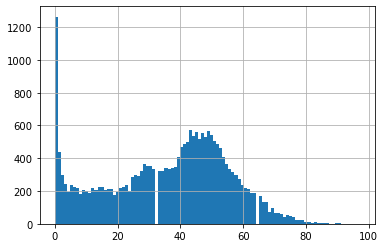

In [101]:
'''
40 or higher seems to be a decent cutoff
will select the cutoff after the train-test-holdout split though to
keep data leakage at a minimum
'''
track_df['popularity'].hist(bins=100)

<AxesSubplot:>

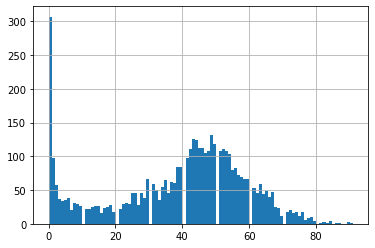

In [121]:
# songs without mp3s skew slightly more popular
track_df[track_df['preview_url'].isna()]['popularity'].hist(bins=100)

In [122]:
# Drop duplicate preview mp3s
mp3s = track_df.drop_duplicates(subset=['preview_url'])
mp3s = mp3s.dropna(subset=['preview_url'])

In [123]:
mp3s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16194 entries, 0 to 22675
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            16194 non-null  object
 1   popularity    16194 non-null  int64 
 2   track         16194 non-null  object
 3   artists       16194 non-null  object
 4   album_name    16194 non-null  object
 5   album_type    16194 non-null  object
 6   release_date  16194 non-null  object
 7   image         16192 non-null  object
 8   duration_ms   16194 non-null  int64 
 9   preview_url   16194 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


<AxesSubplot:>

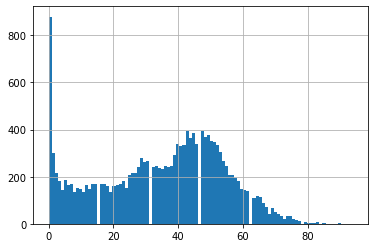

In [125]:
mp3s['popularity'].hist(bins=100)

<AxesSubplot:>

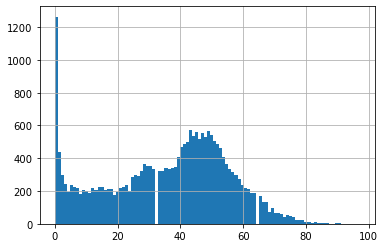

In [130]:
# songs with preview mp3s and all unique songs collected are distributed about the same
# (despite the above thing being true about no mp3 songs)
track_df['popularity'].hist(bins=100)

In [134]:
mp3s.to_csv('data/collection_1_mp3s.csv')

### Stuff with Spotify's audio analysis, will come back to later

In [ ]:
KC = sp.search(q=f"artist:KC Makes Music", market='US')

In [ ]:
KC['tracks']['items'][0]['id']

In [ ]:
sp.audio_features('3W3cS8fgzXc2PcWtywV2gQ')

In [ ]:
sp.audio_analysis('3W3cS8fgzXc2PcWtywV2gQ').keys()

In [ ]:
sp.audio_analysis('3W3cS8fgzXc2PcWtywV2gQ')['track']

In [ ]:
track_df.loc[0,'id']

In [ ]:
sp.audio_features(track_df.loc[0,'id'])[0]

In [ ]:
audio_features_keys

Audio analysis and audio features dataframe
- sample rate = `num_samples`/`duration` = 22050 samples/sec 
- `analysis_channels` = 1, mono sound

In [ ]:
list(sp.audio_features(track_df.loc[0,'id'])[0].keys())

In [ ]:
audio_analysis_keys = ['num_samples','duration',
                       'analysis_sample_rate','end_of_fade_in',
                       'start_of_fade_out','tempo','tempo_confidence','time_signature',
                       'time_signature_confidence','key','key_confidence','mode','mode_confidence']
audio_features_keys = ['loudness','danceability','energy','speechiness',
                       'acousticness','instrumentalness','liveness','valence']
audio_df = pd.DataFrame(columns=['id', *audio_analysis_keys, *audio_features_keys])
audio_df['id'] = track_df['id'].copy()

for track in audio_df['id']:
    analysis = sp.audio_analysis(track)['track']
    features = sp.audio_features(track)[0]
    
    for col in audio_analysis_keys:
        audio_df.loc[audio_df['id'] == track, col] = analysis[col]
    for col in audio_features_keys:
        audio_df.loc[audio_df['id'] == track, col] = features[col]

audio_df

In [ ]:
audio_df.iloc[:,1:].applymap(int).describe()

In [ ]:
list(audio_df.loc[:10,'id'].values)